<a href="https://colab.research.google.com/github/nooralthwabtah/code-lab-quiz/blob/main/Copy_of_Wetaan_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## **Data**

In [ ]:
# 1. Define transforms (convert images to tensors and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # normalize MNIST images
])

# 2. Load datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 341kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.70MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.57MB/s]


## **Sample Image**

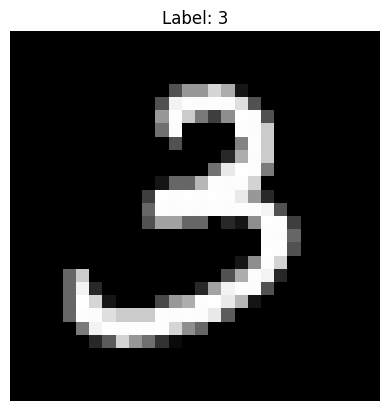

In [ ]:
# 3. Visualize one sample image
for images, labels in trainloader:
    break

plt.imshow(images[0].squeeze(), cmap='gray')
plt.axis('off')
plt.title(f"Label: {labels[0].item()}")
plt.show()

In [ ]:
# 4. Define CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # First conv layer: input channels=1 (grayscale), output channels=32, kernel 3x3
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Second conv layer: input 32, output 64
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))   # (batch, 32, 28, 28)
        x = self.pool(x)            # (batch, 32, 14, 14)
        x = F.relu(self.conv2(x))   # (batch, 64, 14, 14)
        x = self.pool(x)            # (batch, 64, 7, 7)
        x = x.view(-1, 64 * 7 * 7) # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# 5. Initialize model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 6. Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}")

Epoch 1/5, Loss: 0.1319
Epoch 2/5, Loss: 0.0427
Epoch 3/5, Loss: 0.0282
Epoch 4/5, Loss: 0.0202
Epoch 5/5, Loss: 0.0166


In [ ]:
# to save the model
torch.save(model.state_dict(), "mnist_cnn.pth")
print("Model saved to mnist_cnn.pth")

Model saved to mnist_cnn.pth


In [ ]:
# to download the model in my computer
from google.colab import files
files.download("mnist_cnn.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 7. Evaluation on test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 99.15%


## **Bonus Task:**
Link the model to an interactive streamlit app :)